<a href="https://colab.research.google.com/github/LZatTD/sankey/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Dec 19 15:13:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! [ -e /content ] && pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 194kB 5.5MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 1.1MB 17.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

#path = Path('/content/gdrive/MyDrive/data')
#path.mkdir(parents=True, exist_ok=True)
#path = untar_data(URLs.PETS, dest=path); path

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(1)
#learn.fit_one_cycle(5)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.065785,0.011979,0.005413,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.047481,0.005037,0.001353,01:16


In [4]:
img = PILImage.create('/content/gdrive/MyDrive/data/cat.jpeg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [5]:
img = PILImage.create('/content/gdrive/MyDrive/data/dog.jpeg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


In [10]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(16)

epoch,train_loss,valid_loss,time
0,3.951570,2.639373,00:05


epoch,train_loss,valid_loss,time
0,2.105375,1.733925,00:05
1,1.739049,1.286809,00:05
2,1.540126,1.189685,00:05
3,1.404324,1.225582,00:05
4,1.373070,1.240795,00:05
5,1.309936,0.903986,00:05
6,1.234482,0.957347,00:05
7,1.149981,0.742514,00:05
8,1.058982,0.709500,00:05
9,0.978119,0.652362,00:05


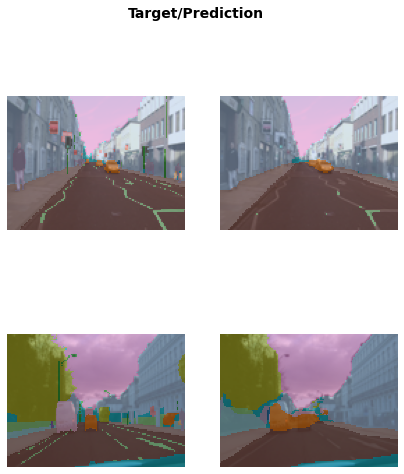

In [13]:
learn.show_results(max_n=6, figsize=(7,8))

In [2]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.604690,0.400902,0.819200,01:37


epoch,train_loss,valid_loss,accuracy,time
0,0.327025,0.247812,0.898320,02:41
1,0.245751,0.270562,0.888200,02:40
2,0.204949,0.185458,0.929680,02:40
3,0.155768,0.189613,0.929160,02:40


In [3]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0013, 0.9987]))

In [6]:
learn.predict("so worse!")

('neg', tensor(0), tensor([0.9520, 0.0480]))

In [7]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [8]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.357905,0.361843,0.827856,00:05
1,0.345083,0.359493,0.831081,00:05
2,0.337770,0.354371,0.832463,00:05


In [9]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.509983,1.444805,00:00


epoch,train_loss,valid_loss,time
0,1.367362,1.388143,00:00
1,1.244986,1.212668,00:00
2,1.004051,0.931979,00:00
3,0.776343,0.815013,00:00
4,0.670121,0.785978,00:00
5,0.624771,0.777203,00:00
6,0.613167,0.773289,00:00
7,0.601102,0.771314,00:00
8,0.601819,0.770603,00:00
9,0.593717,0.770450,00:00


In [10]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,32.0,60.0,5.0,4.802409
1,19.0,66.0,4.0,4.321216
2,98.0,1.0,5.0,4.373653
3,57.0,34.0,1.5,3.584212
4,34.0,42.0,5.0,3.712364
5,63.0,44.0,2.0,2.860562
6,82.0,67.0,4.0,3.891863
7,53.0,37.0,3.0,3.929826
8,1.0,20.0,1.0,3.809575
